# Statistics

#### Imports

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import statistics
import scipy
from scipy import stats

## Level 1

### Exercise 1

#### Statistics

Working with data set from kaggle.com about city bikes in Helsinki. https://www.kaggle.com/geometrein/helsinki-city-bikes

In [3]:
bike_df = pd.read_csv('database.csv',low_memory=False)

In [4]:
bike_df.head(3)

,departure,return,departure_id,departure_name,return_id,return_name,distance (m),duration (sec.),avg_speed (km/h),departure_latitude,departure_longitude,return_latitude,return_longitude,Air temperature (degC)
0,2020-03-23 06:09:44,2020-03-23 06:16:26,86,Kuusitie,111.0,Esterinportti,1747.0,401.0,0.261397,60.195245,24.901900,60.197572,24.926781,0.9
1,2020-03-23 06:11:58,2020-03-23 06:26:31,26,Kamppi (M),10.0,Kasarmitori,1447.0,869.0,0.099908,60.168610,24.930537,60.165017,24.949473,0.9
2,2020-03-23 06:16:29,2020-03-23 06:24:23,268,Porolahden koulu,254.0,Agnetankuja,1772.0,469.0,0.226695,60.195540,25.053581,60.187234,25.036412,0.9


In [5]:
#renaming columns
bike_df.rename(columns={'duration (sec.)': 'duration_sec'}, inplace=True)
bike_df.rename(columns={'distance (m)': 'distance_m'}, inplace=True)
bike_df.rename(columns={'avg_speed (km/h)': 'avg_speed_km_h'}, inplace=True)
bike_df.rename(columns={'Air temperature (degC)': 'air_temperature_C'}, inplace=True)

In [6]:
bike_df.head(3)

,departure,return,departure_id,departure_name,return_id,return_name,distance_m,duration_sec,avg_speed_km_h,departure_latitude,departure_longitude,return_latitude,return_longitude,air_temperature_C
0,2020-03-23 06:09:44,2020-03-23 06:16:26,86,Kuusitie,111.0,Esterinportti,1747.0,401.0,0.261397,60.195245,24.901900,60.197572,24.926781,0.9
1,2020-03-23 06:11:58,2020-03-23 06:26:31,26,Kamppi (M),10.0,Kasarmitori,1447.0,869.0,0.099908,60.168610,24.930537,60.165017,24.949473,0.9
2,2020-03-23 06:16:29,2020-03-23 06:24:23,268,Porolahden koulu,254.0,Agnetankuja,1772.0,469.0,0.226695,60.195540,25.053581,60.187234,25.036412,0.9


In [7]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12157458 entries, 0 to 12157457
Data columns (total 14 columns):
 #   Column               Dtype  
---  ------               -----  
 0   departure            object 
 1   return               object 
 2   departure_id         object 
 3   departure_name       object 
 4   return_id            object 
 5   return_name          object 
 6   distance_m           float64
 7   duration_sec         float64
 8   avg_speed_km_h       float64
 9   departure_latitude   float64
 10  departure_longitude  float64
 11  return_latitude      float64
 12  return_longitude     float64
 13  air_temperature_C    float64
dtypes: float64(8), object(6)
memory usage: 1.3+ GB


In [8]:
bike_df.describe()

,distance_m,duration_sec,avg_speed_km_h,departure_latitude,departure_longitude,return_latitude,return_longitude,air_temperature_C
count,1.215746e+07,1.215746e+07,1.215391e+07,1.215746e+07,1.215746e+07,1.215746e+07,1.215746e+07,1.214156e+07
mean,2.295275e+03,9.597751e+02,3.355556e-01,6.017981e+01,2.492023e+01,6.017971e+01,2.492023e+01,1.565044e+01
std,2.452067e+04,7.346528e+03,3.428006e+01,1.733003e-02,5.764062e-02,1.738792e-02,5.783290e-02,5.497952e+00
min,-4.292467e+06,0.000000e+00,-4.689001e+02,6.014792e+01,2.472137e+01,6.014792e+01,2.472137e+01,-5.200000e+00
25%,1.000000e+03,3.440000e+02,1.467403e-01,6.016723e+01,2.490969e+01,6.016689e+01,2.490969e+01,1.230000e+01
50%,1.739000e+03,5.860000e+02,1.863679e-01,6.017608e+01,2.493407e+01,6.017559e+01,2.493407e+01,1.640000e+01
75%,2.869000e+03,9.710000e+02,2.204348e-01,6.018964e+01,2.495029e+01,6.018964e+01,2.495029e+01,1.930000e+01
max,3.681399e+06,5.401659e+06,1.699104e+04,6.023911e+01,2.510620e+01,6.023911e+01,2.510620e+01,3.290000e+01


In [9]:
#work only with duration of some values and filter duration of 0 seconds
group1=bike_df[bike_df['duration_sec'] > 0]

In [10]:
#to check if the min value is higher than 0
group1['duration_sec'].min()

1.0

**MODE - the value that appears most frequently in a data set**

In [25]:
mode = group1.loc[:,'duration_sec'].mode()
mode = mode.get(key = 0)
print('The most frequent duration of journey on bike is:',mode,'seconds.')

The most frequent duration of journey on bike is: 17.0 seconds.


**MEDIAN - the value separating the higher half from the lower half of a data set**

In [28]:
group1.loc[:,'duration_sec'].median()

586.0

In [29]:
median = group1.loc[:,'duration_sec'].median()
print('The middle value of journey duration on bike is:',median,'seconds.')

The middle value of journey duration on bike is: 586.0 seconds.


**STANDARD DEVIATION - number used to tell how measurements for a group are spread out from the average**

In [32]:
std = group1.loc[:,'duration_sec'].std()
print('The standard deviation of journey duration on bike is:',round(std,2),'seconds.')

The standard deviation of journey duration on bike is: 7347.58 seconds.


**ARITHMETIC MEAN - the result you get by adding two or more amounts together and dividing the total by the number of amounts**

In [34]:
mean = group1.loc[:,'duration_sec'].mean()
print('The average of a bike journey duration is:',round(mean,2),'seconds.')

The average of a bike journey duration is: 960.06 seconds.


### Execise 2 - statistics: correlation of duration and temperature.

Correlation doesn't mean the lower temperatures are causing less duration, but I would like to analyze these two values because they might influence each other.

In [29]:
bike_df['duration_sec'].corr(bike_df['air_temperature_C'])

-0.0013979666540646577

Correlation between duration and temperature is very close to 0. That means there is no meaningful relationship between variables. My initial guess was wrong!

## Level 2

### Execise 3

#### Correlation

In [36]:
corr = bike_df.corr()
corr.style.background_gradient(cmap="Blues")

,distance_m,duration_sec,avg_speed_km_h,departure_latitude,departure_longitude,return_latitude,return_longitude,air_temperature_C
distance_m,1.000000,0.007743,0.697040,0.004493,0.004420,0.004400,0.004349,0.001453
duration_sec,0.007743,1.000000,-0.000732,0.001837,0.002643,0.002946,0.002245,-0.001398
avg_speed_km_h,0.697040,-0.000732,1.000000,-0.000599,0.001217,-0.000604,0.001209,-0.000910
departure_latitude,0.004493,0.001837,-0.000599,1.000000,0.129105,0.728923,0.116697,-0.032527
departure_longitude,0.004420,0.002643,0.001217,0.129105,1.000000,0.117984,0.895655,-0.013786
return_latitude,0.004400,0.002946,-0.000604,0.728923,0.117984,1.000000,0.129012,-0.032058
return_longitude,0.004349,0.002245,0.001209,0.116697,0.895655,0.129012,1.000000,-0.012419
air_temperature_C,0.001453,-0.001398,-0.000910,-0.032527,-0.013786,-0.032058,-0.012419,1.000000


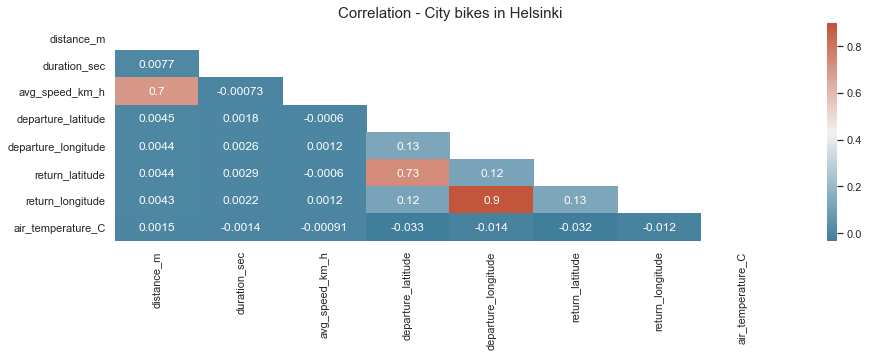

In [38]:
fig,ax = plt.subplots(figsize=(15,4))
sns.set_theme(style="white")
cmap = sns.diverging_palette(230, 20, as_cmap=True)

matrix = np.triu(corr)
sns.heatmap(corr, annot=True, mask=matrix, cmap=cmap)
plt.title('Correlation - City bikes in Helsinki', fontsize = 15)
plt.show()

## Level 3

### Execise 4

#### Geometric mean and harmonic mean

In [40]:
geo_mean = scipy.stats.gmean(group1.loc[:,'duration_sec'])
print('The geometric mean is:',round(geo_mean),'seconds.')

The geometric mean is: 535.0 seconds.


In [41]:
har_mean = statistics.harmonic_mean(group1['duration_sec'])
print('The harmonic is:',round(har_mean),'seconds.')

The harmonic is: 257 seconds.
